In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import keras
from keras.models import Model
from keras.layers import Input, Dense, Activation
from keras.utils import np_utils

In [8]:
dataset = pd.read_csv('../datasets/fashion-mnist-test.csv')
dataset = dataset.values

In [9]:
X, y = dataset[:, 1:]/255, dataset[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
y_train = np_utils.to_categorical(y_train)
y_test  = np_utils.to_categorical(y_test)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 784), (2000, 784), (8000, 10), (2000, 10))

### NN using Keras Functional API

In [37]:
inp = Input(shape=(784,))
fc1 = Dense(256, activation='sigmoid')(inp)
fc2 = Dense( 64, activation='tanh')(fc1)
out = Dense( 10, activation='softmax')(fc2)

model = Model(inputs=inp, outputs=out)

### VS ###
# model = Sequential()

# model.add(Dense(256, input_shape=(784,)))
# model.add(Activation('sigmoid'))

# model.add(Dense(64))
# model.add(Activation('tanh'))

# model.add(Dense(10))
# model.add(Activation('softmax'))

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Initialize Weights
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [40]:
hist = model.fit(X_train, y_train,
          shuffle=True,
          epochs=100,
          batch_size=256,
          validation_data=(X_test, y_test)
         )

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 0s 30us/step - loss: 2.2682 - acc: 0.1340 - val_loss: 2.2058 - val_acc: 0.2605
Epoch 2/100
8000/8000 [==============================] - 0s 28us/step - loss: 2.1565 - acc: 0.3539 - val_loss: 2.1043 - val_acc: 0.3935
Epoch 3/100
8000/8000 [==============================] - 0s 26us/step - loss: 2.0517 - acc: 0.4514 - val_loss: 1.9982 - val_acc: 0.4490
Epoch 4/100
8000/8000 [==============================] - 0s 27us/step - loss: 1.9442 - acc: 0.4971 - val_loss: 1.8890 - val_acc: 0.5485
Epoch 5/100
8000/8000 [==============================] - 0s 31us/step - loss: 1.8355 - acc: 0.5554 - val_loss: 1.7833 - val_acc: 0.5575
Epoch 6/100
8000/8000 [==============================] - 0s 28us/step - loss: 1.7329 - acc: 0.5819 - val_loss: 1.6871 - val_acc: 0.6045
Epoch 7/100
8000/8000 [==============================] - 0s 28us/step - loss: 1.6382 - acc: 0.6166 - val_loss: 1.5983 - val_acc: 0.5965


8000/8000 [==============================] - 0s 36us/step - loss: 0.6786 - acc: 0.7651 - val_loss: 0.6916 - val_acc: 0.7640
Epoch 61/100
8000/8000 [==============================] - 0s 30us/step - loss: 0.6752 - acc: 0.7664 - val_loss: 0.6895 - val_acc: 0.7620
Epoch 62/100
8000/8000 [==============================] - 0s 49us/step - loss: 0.6724 - acc: 0.7644 - val_loss: 0.6854 - val_acc: 0.7615
Epoch 63/100
8000/8000 [==============================] - 0s 26us/step - loss: 0.6693 - acc: 0.7691 - val_loss: 0.6833 - val_acc: 0.7625
Epoch 64/100
8000/8000 [==============================] - 0s 46us/step - loss: 0.6663 - acc: 0.7676 - val_loss: 0.6802 - val_acc: 0.7660
Epoch 65/100
8000/8000 [==============================] - 0s 37us/step - loss: 0.6632 - acc: 0.7685 - val_loss: 0.6796 - val_acc: 0.7640
Epoch 66/100
8000/8000 [==============================] - 1s 63us/step - loss: 0.6606 - acc: 0.7705 - val_loss: 0.6748 - val_acc: 0.7675
Epoch 67/100
8000/8000 [==============================

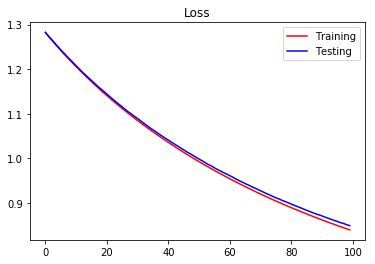

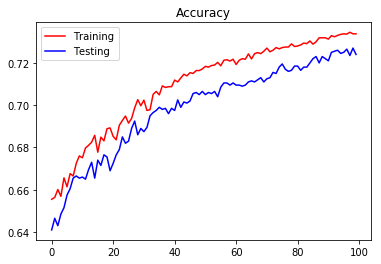

In [36]:
plt.figure(0)
plt.title("Loss")
plt.plot(hist.history['loss'], 'r', label='Training')
plt.plot(hist.history['val_loss'], 'b', label='Testing')
plt.legend()
plt.show()

plt.figure(1)
plt.title("Accuracy")
plt.plot(hist.history['acc'], 'r', label='Training')
plt.plot(hist.history['val_acc'], 'b', label='Testing')
plt.legend()
plt.show()

In [28]:
# class MyLayer:
#     def __init__(self, n, activation=None):
#         self.neurons = n
#         self.activation = activation
#         self.next = None
        
#     def __call__(self, tensor):
#         print("I have been called")
#         self.next = tensor
        
# l1 = MyLayer(256, activation='sigmoid')
# print(l1.neurons, l1.activation)
# l1(1)